# Not enough chunks

In [ ]:
import nannyml as nml
reference_df, analysis_df, _ = nml.load_synthetic_car_loan_dataset()
cbpe = nml.CBPE(
    y_pred_proba='y_pred_proba',
    y_pred='y_pred',
    y_true='repaid',
    timestamp_column_name='timestamp',
    chunk_number=5,
    metrics=['roc_auc'],
    problem_type='classification_binary',
).fit(reference_data=reference_df)
est_perf = cbpe.estimate(analysis_df)

/home/niels/Code/nml/nannyml/nannyml/chunk.py:181: UserWarning: The resulting number of chunks is too low. Please consider splitting your data in a different way or continue at your own risk.
  warnings.warn(


/home/niels/Code/nml/nannyml/nannyml/chunk.py:181: UserWarning: The resulting number of chunks is too low. Please consider splitting your data in a different way or continue at your own risk.
  warnings.warn(
/home/niels/Code/nml/nannyml/nannyml/chunk.py:181: UserWarning: The resulting number of chunks is too low. Please consider splitting your data in a different way or continue at your own risk.
  warnings.warn(


# Not enough observations in chunk

# Sampling error

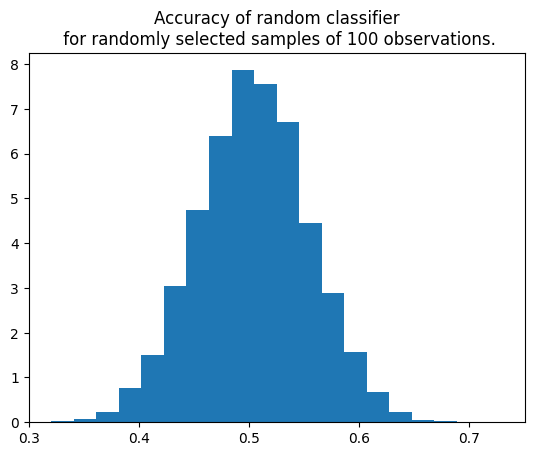

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

sample_size = 100
dataset_size = 10_000
# random model
np.random.seed(23)
y_true = np.random.binomial(1, 0.5, dataset_size)
y_pred = np.random.binomial(1, 0.5, dataset_size)
accuracy_scores = []

for experiment in range(10_000):
    subset_indexes = np.random.choice(dataset_size, sample_size, replace=False) # get random indexes
    y_true_subset = y_true[subset_indexes]
    y_pred_subset = y_pred[subset_indexes]
    accuracy_scores.append(accuracy_score(y_true_subset, y_pred_subset))

plt.hist(accuracy_scores, bins=20, density=True)
plt.title("Accuracy of random classifier\n for randomly selected samples of 100 observations.");
plt.savefig("../_static/how-it-works/chunks_stability_of_accuracy.svg", format="svg")

In [ ]:
obs_level_accuracy = y_true == y_pred
np.mean(obs_level_accuracy), accuracy_score(y_true, y_pred)

(0.5045, 0.5045)

In [ ]:
SEM_std = np.std(obs_level_accuracy)/np.sqrt(sample_size)
np.round(SEM_std, 3), np.round(np.std(accuracy_scores), 3)

(0.05, 0.05)